<a href="https://colab.research.google.com/github/Ashmit990/Assessment-Classification-Task/blob/main/2510316_AshmitDahal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gthbhyfrom google.colab import files
uploaded = files.upload()

Saving Co2_Emissions_by_Sectors.csv to Co2_Emissions_by_Sectors.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Co2_Emissions_by_Sectors.csv')
print("DataFrame loaded successfully.")

# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# Display concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Discretize 'Co2_Emissions_MetricTons' into categories
# Using qcut for quantile-based categorization to ensure equal distribution in each category
df['Co2_Emissions_Category'] = pd.qcut(
    df['Co2_Emissions_MetricTons'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Display value counts of the new categorical column
print("\nValue counts for 'Co2_Emissions_Category':")
print(df['Co2_Emissions_Category'].value_counts())

DataFrame loaded successfully.

First 5 rows of the DataFrame:
   Industry_Type         Region       Country  Year  Co2_Emissions_MetricTons  \
0   Construction  North America        Brazil  2010                     89.13   
1         Mining         Europe       Germany  2006                    224.81   
2  Manufacturing  South America  South Africa  2017                    179.72   
3   Construction         Europe         India  2018                     23.28   
4   Construction         Africa         China  2013                    124.54   

   Energy_Consumption_TWh  Automobile_Co2_Emissions_MetricTons  \
0                   90.14                                98.37   
1                  931.70                                10.81   
2                  255.14                                55.36   
3                  887.29                                78.99   
4                  923.03                                65.93   

   Industrial_Co2_Emissions_MetricTons  Agriculture_C

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(['Co2_Emissions_MetricTons', 'Co2_Emissions_Category'], axis=1)
y = df['Co2_Emissions_Category']

print("Features and target separated.")

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Features and target separated.
Numerical columns: ['Year', 'Energy_Consumption_TWh', 'Automobile_Co2_Emissions_MetricTons', 'Industrial_Co2_Emissions_MetricTons', 'Agriculture_Co2_Emissions_MetricTons', 'Domestic_Co2_Emissions_MetricTons', 'Population_Millions', 'GDP_Billion_USD', 'Urbanization_Percentage', 'Renewable_Energy_Percentage', 'Industrial_Growth_Percentage', 'Transport_Growth_Percentage']
Categorical columns: ['Industry_Type', 'Region', 'Country']


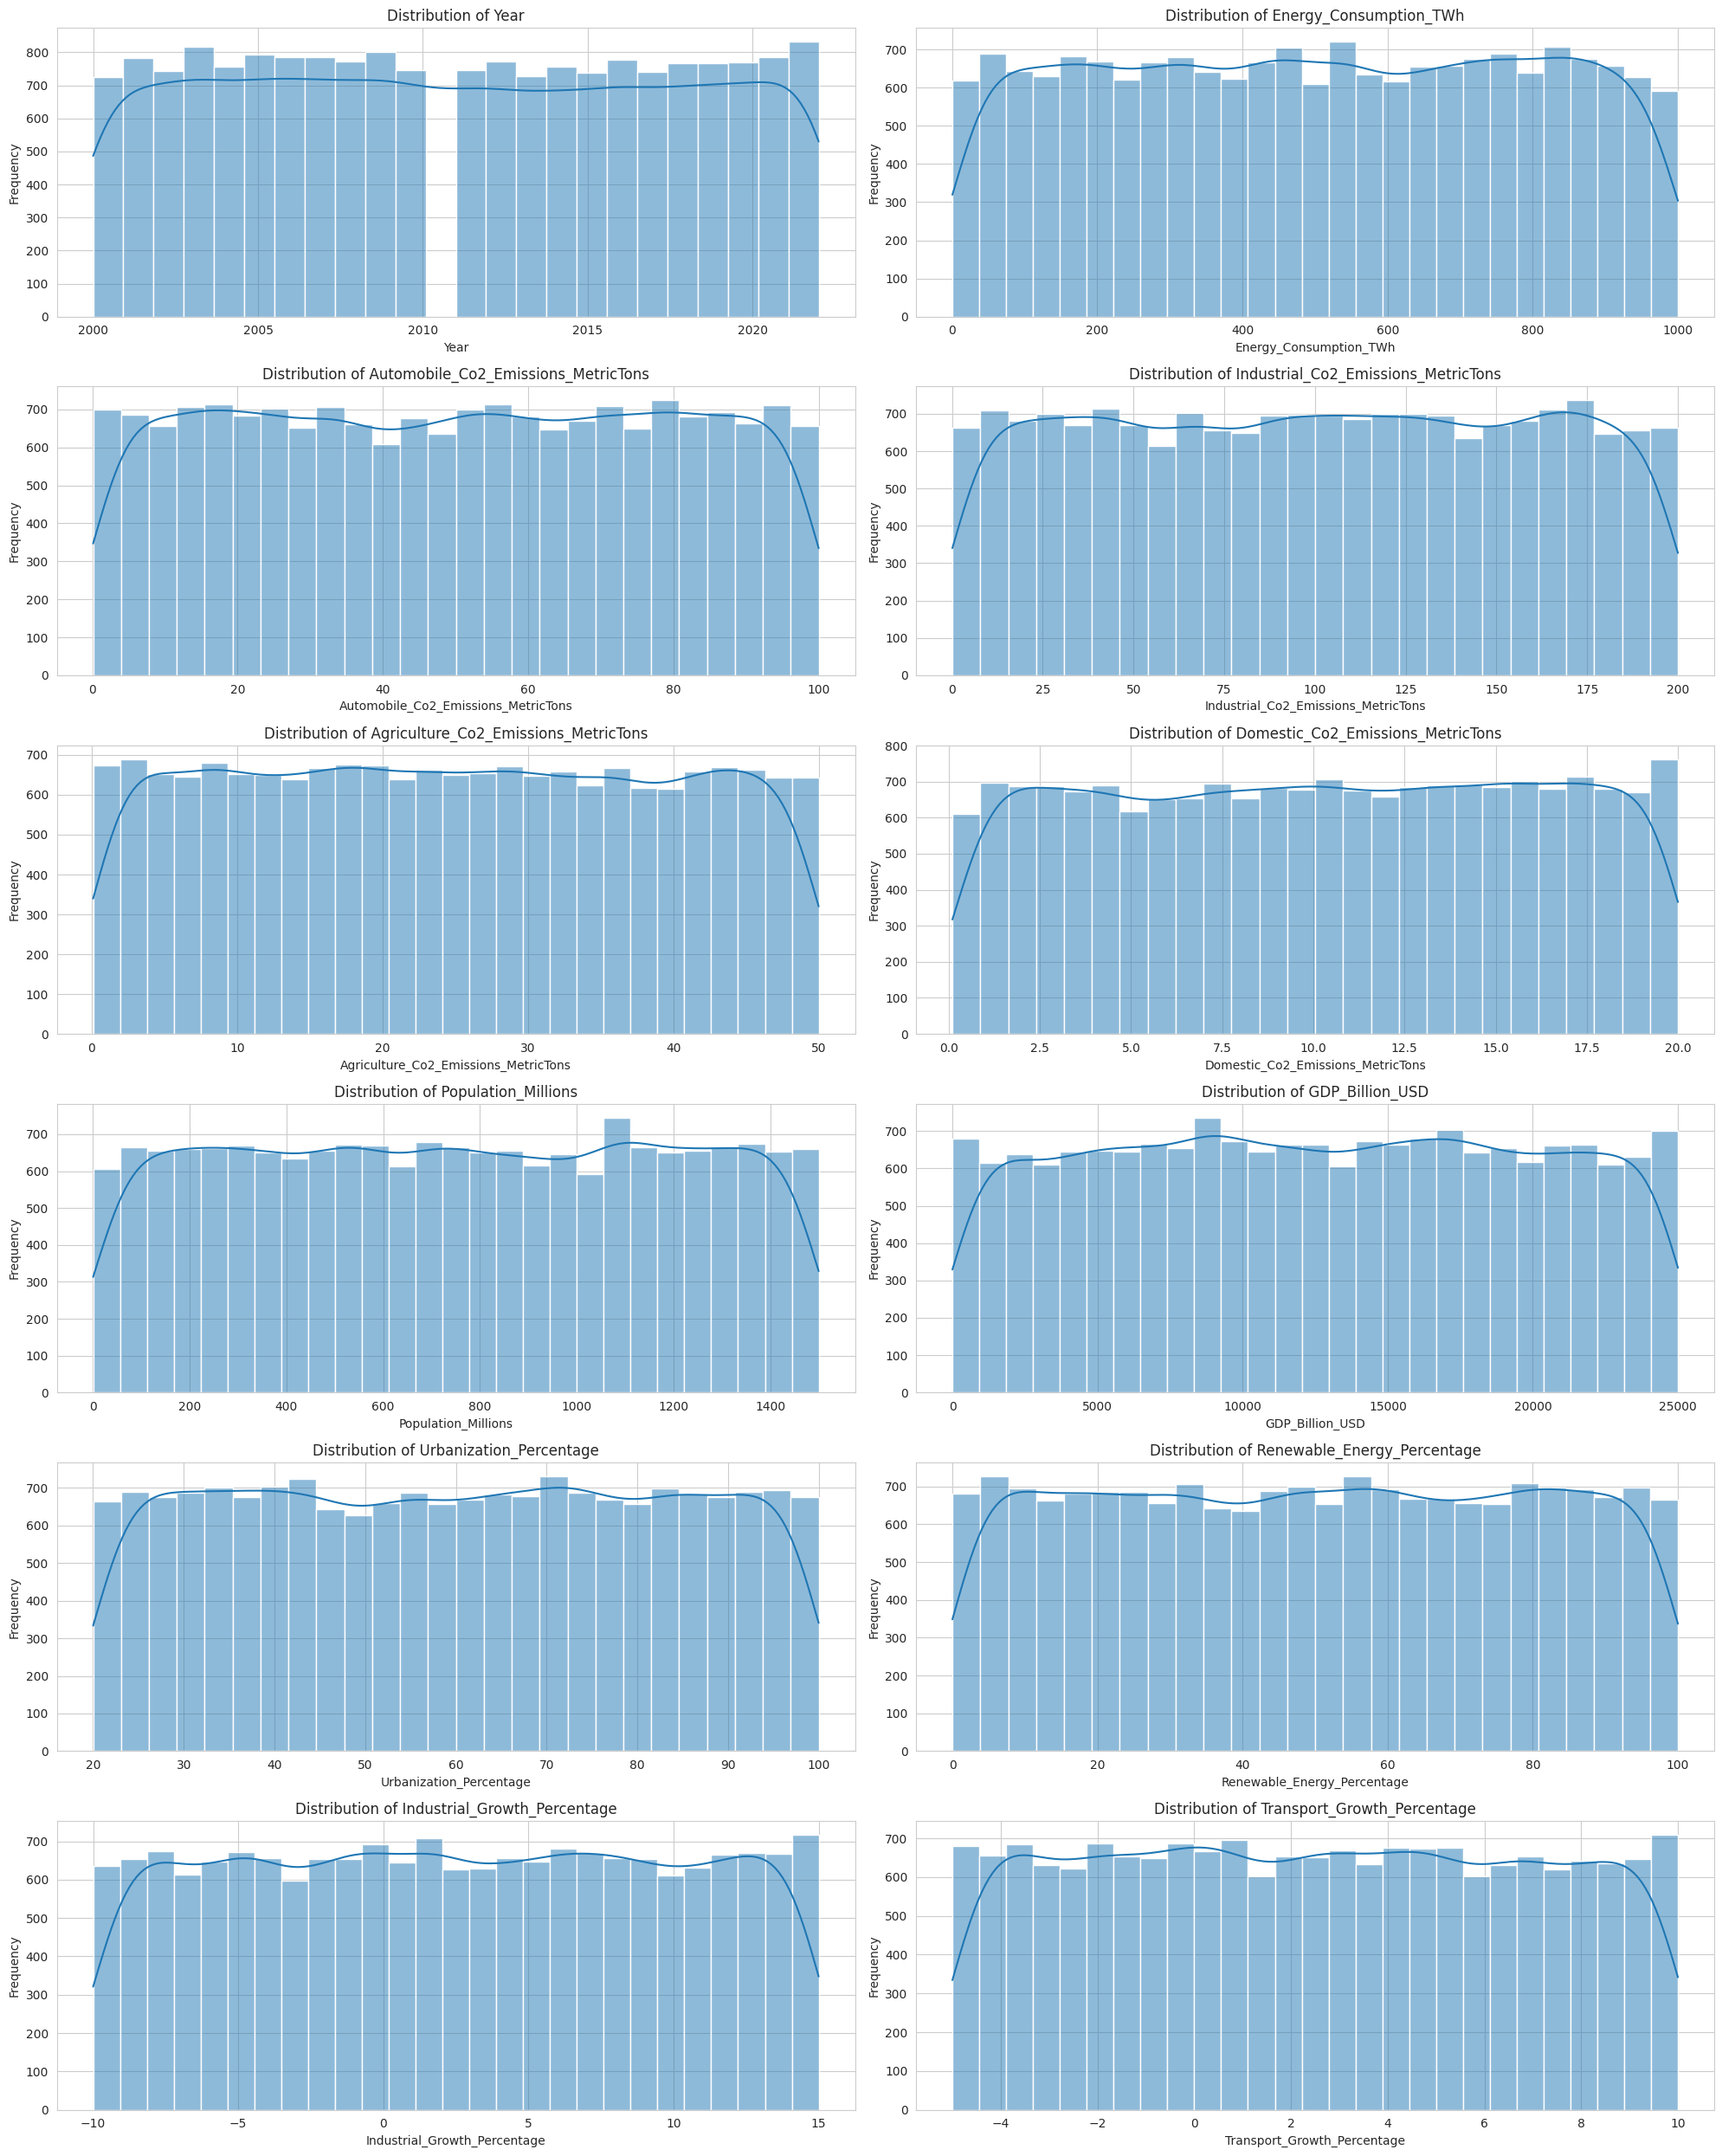

Histograms for numerical features displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Create histograms for numerical features
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 2, i + 1) # Adjust subplot grid as needed based on number of numerical columns
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()
print("Histograms for numerical features displayed.")

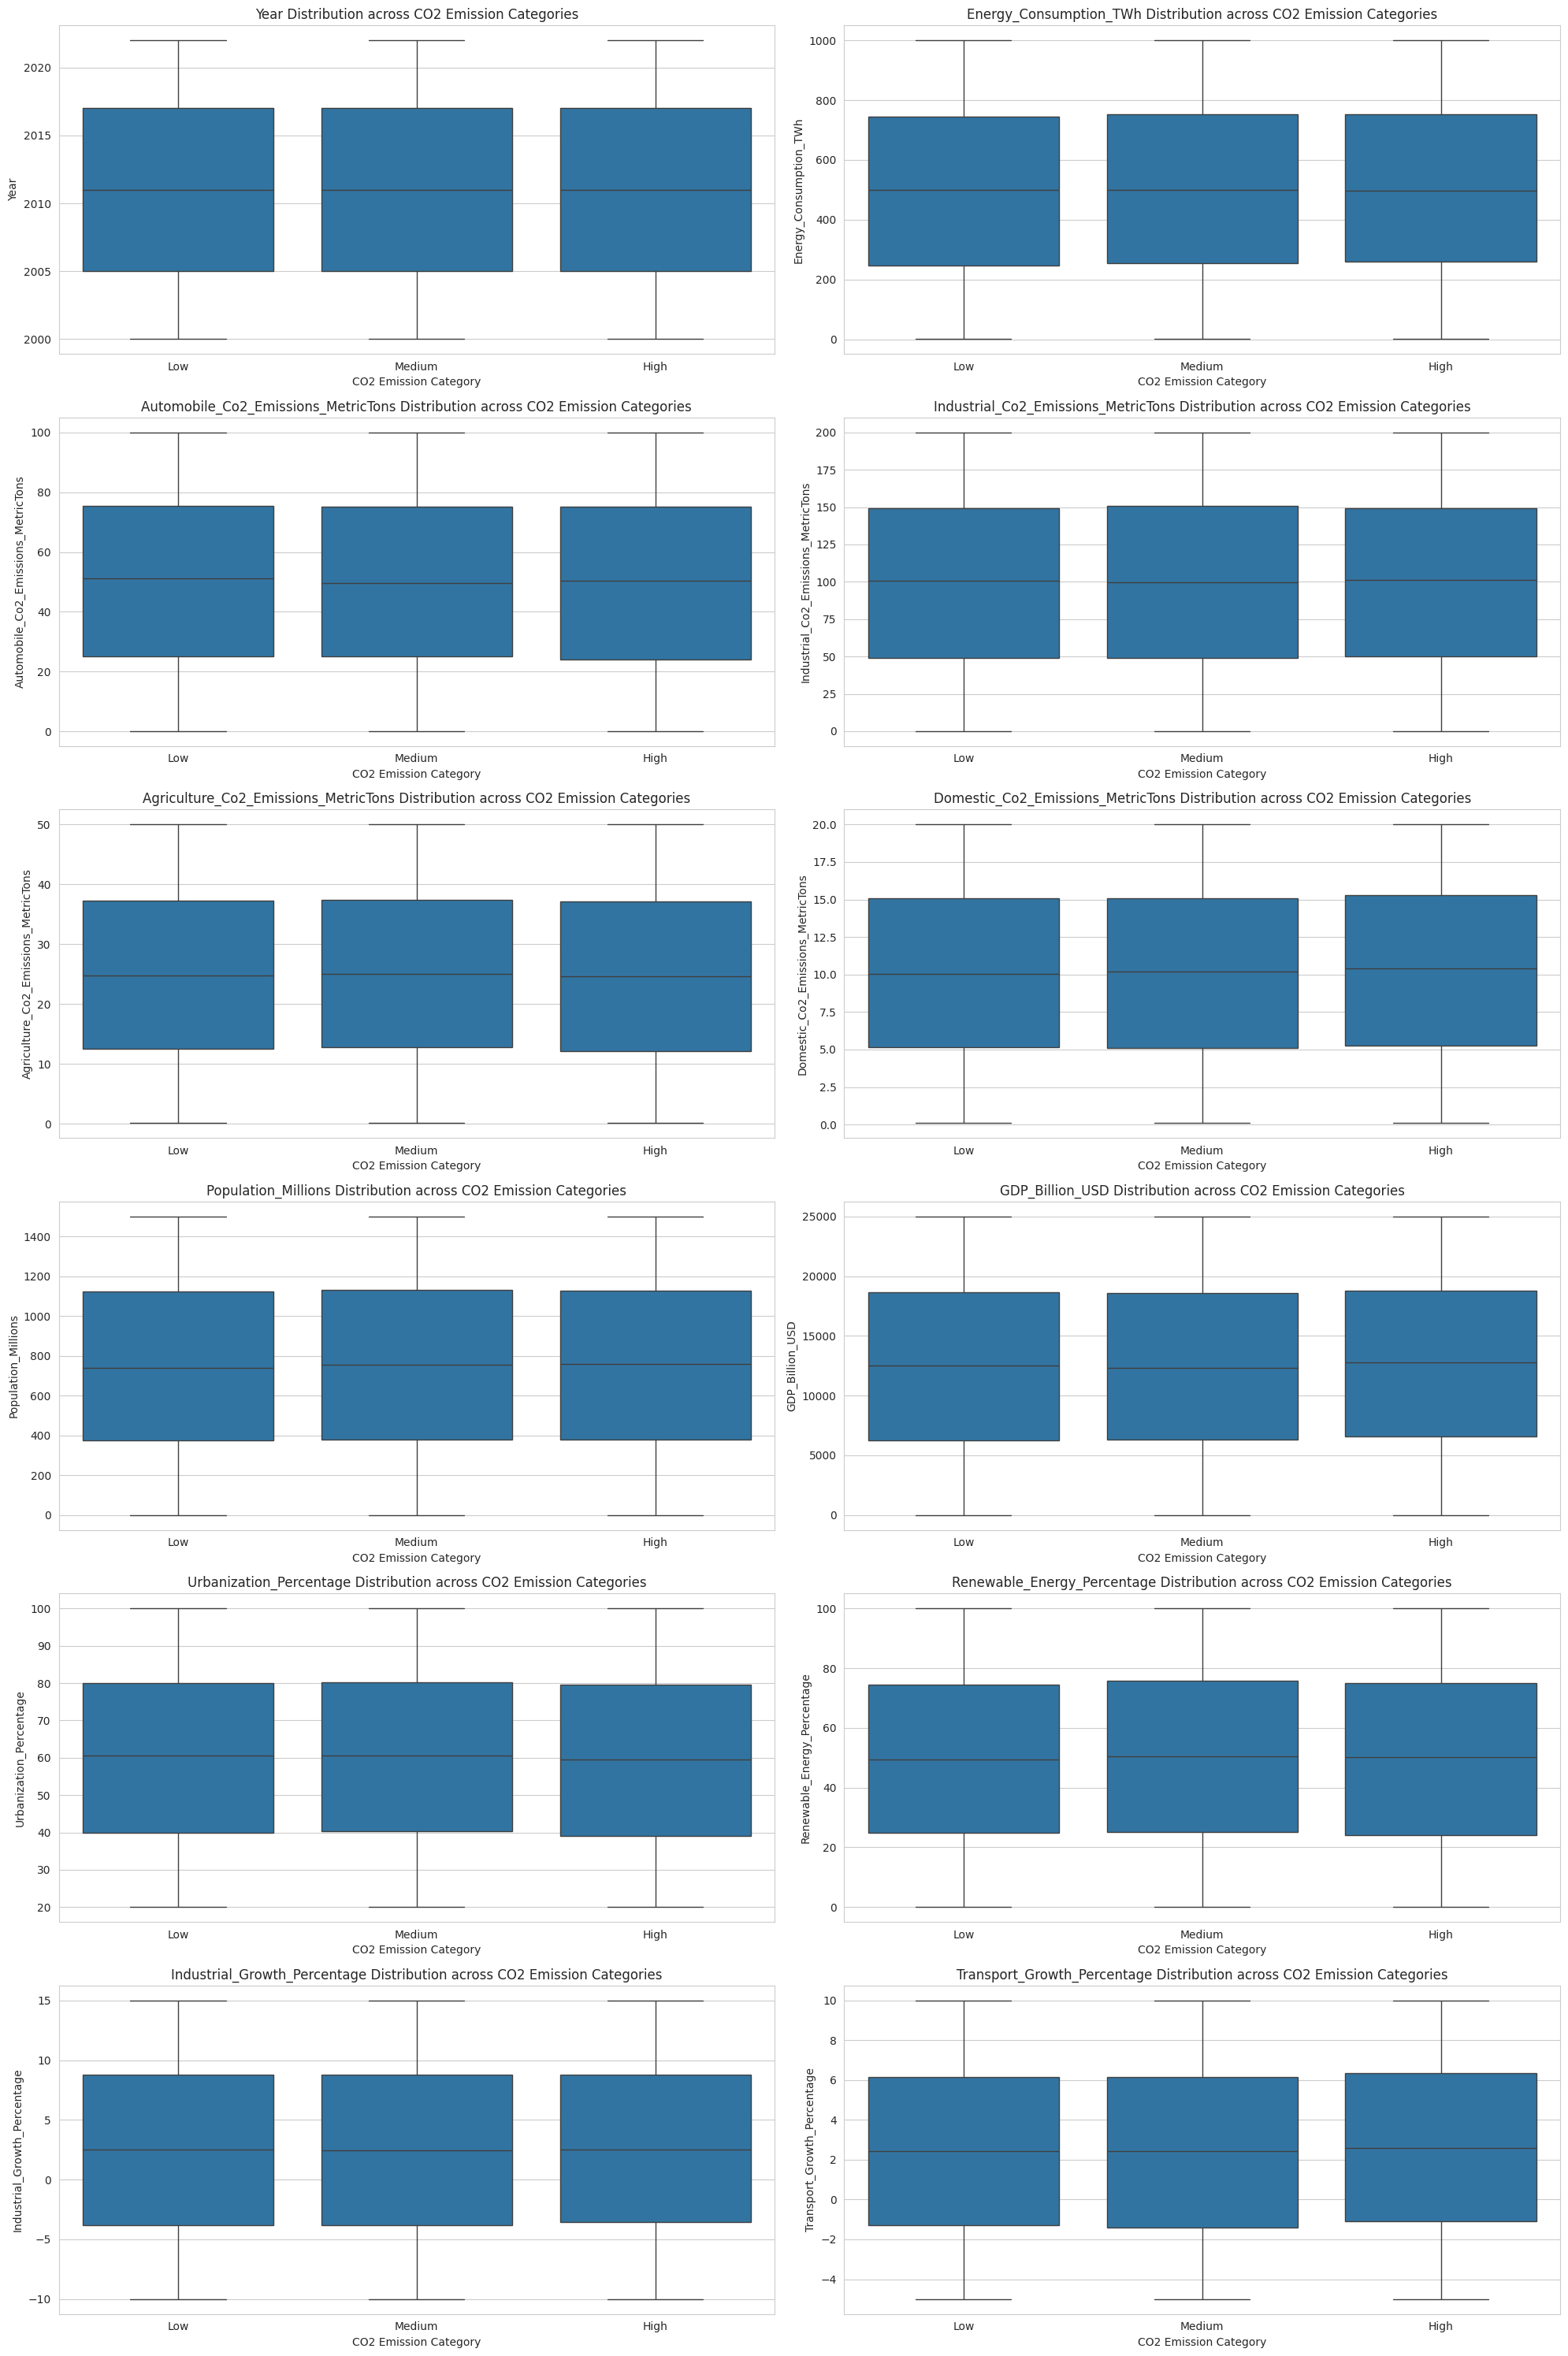

Box plots for numerical features across CO2 emission categories displayed.


In [ ]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 2, i + 1) # Adjust subplot grid as needed
    sns.boxplot(x=y, y=X[col], order=['Low', 'Medium', 'High'])
    plt.title(f'{col} Distribution across CO2 Emission Categories', fontsize=12)
    plt.xlabel('CO2 Emission Category', fontsize=10)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()
plt.show()
print("Box plots for numerical features across CO2 emission categories displayed.")

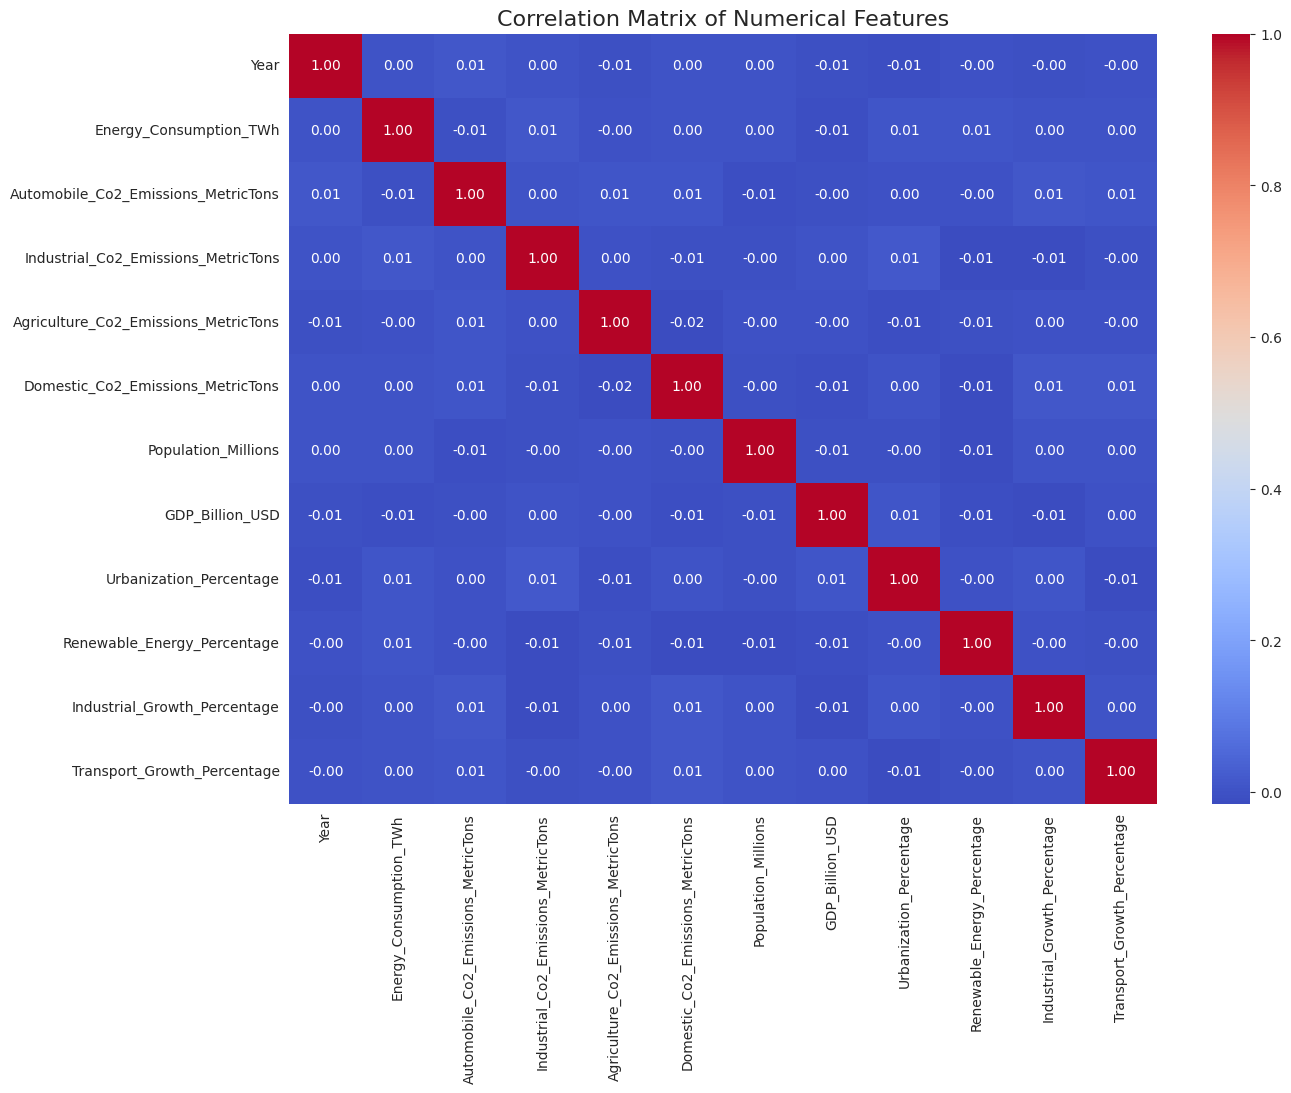

Correlation matrix heatmap for numerical features displayed.


In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(X[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()
print("Correlation matrix heatmap for numerical features displayed.")

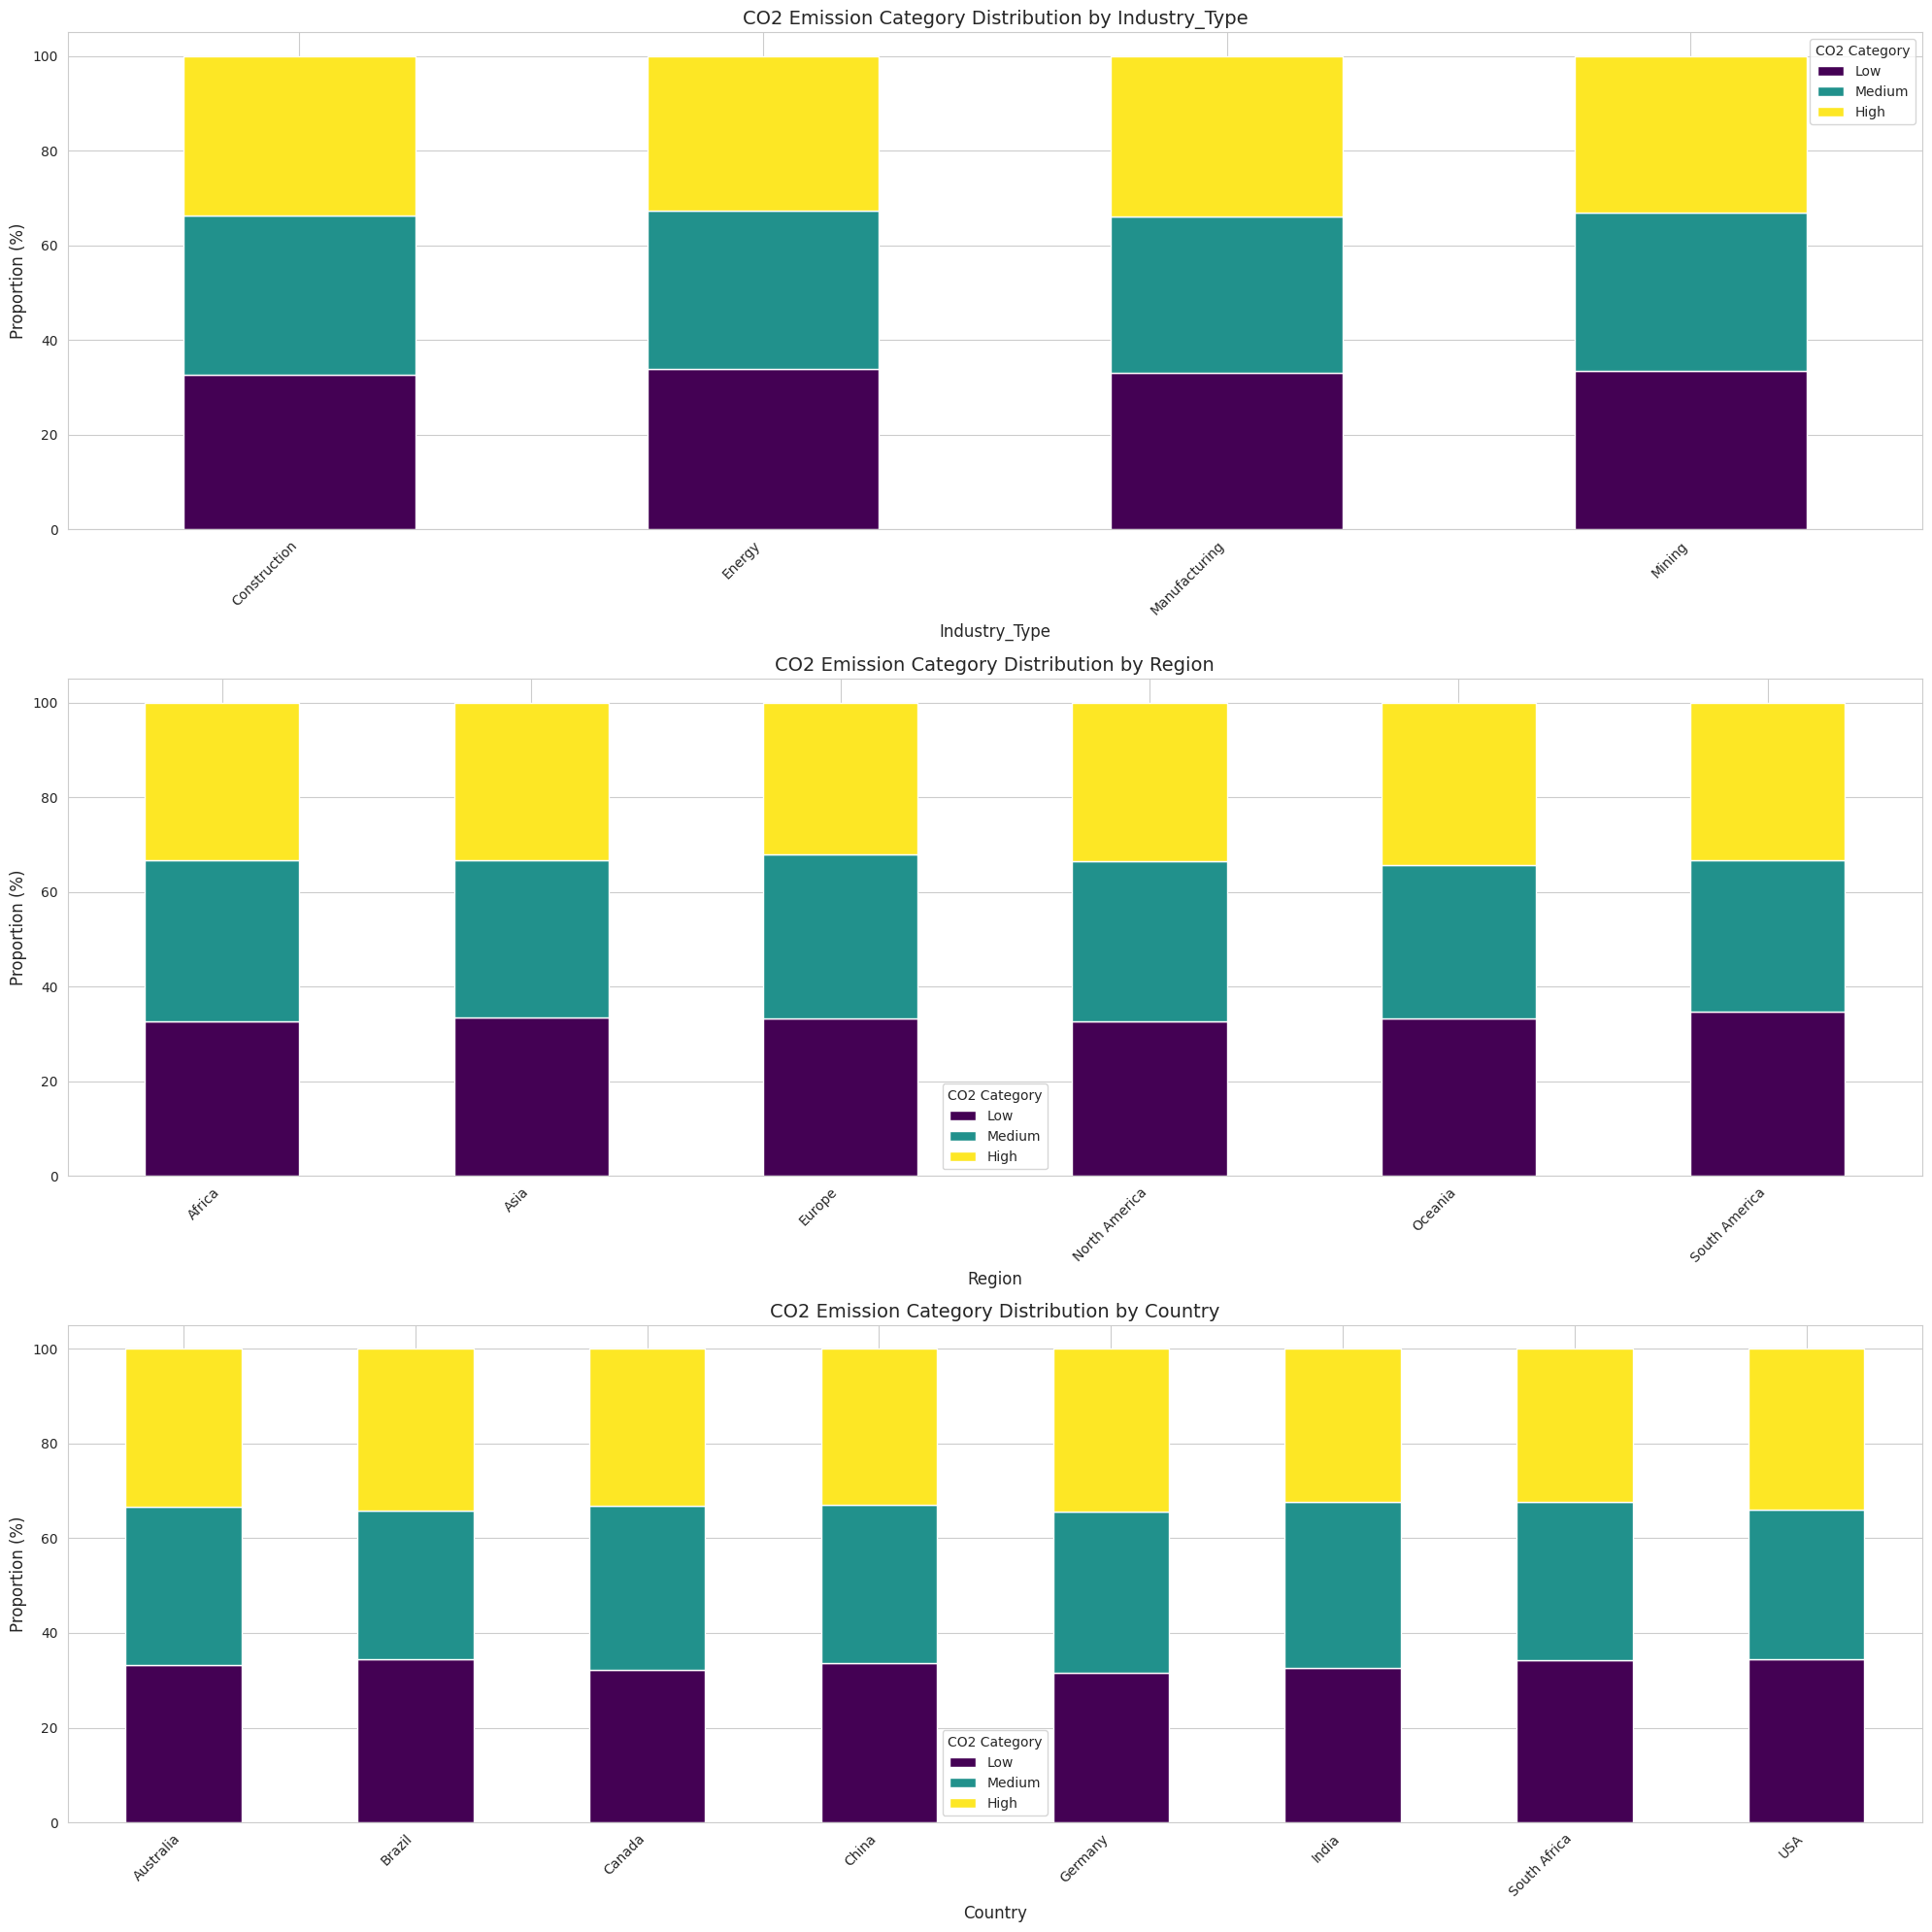

Bar plots for categorical features across CO2 emission categories displayed.


In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1) # Adjust subplot grid as needed
    # Using crosstab to get counts of target categories per feature category
    cross_tab = pd.crosstab(X[col], y, normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'CO2 Emission Category Distribution by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Proportion (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='CO2 Category')
plt.tight_layout()
plt.show()
print("Bar plots for categorical features across CO2 emission categories displayed.")

In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Categorical features one-hot encoded.")
print(f"Shape of X after one-hot encoding: {X_encoded.shape}")
print("First 5 rows of X_encoded:")
print(X_encoded.head())

Categorical features one-hot encoded.
Shape of X after one-hot encoding: (17686, 27)
First 5 rows of X_encoded:
   Year  Energy_Consumption_TWh  Automobile_Co2_Emissions_MetricTons  \
0  2010                   90.14                                98.37   
1  2006                  931.70                                10.81   
2  2017                  255.14                                55.36   
3  2018                  887.29                                78.99   
4  2013                  923.03                                65.93   

   Industrial_Co2_Emissions_MetricTons  Agriculture_Co2_Emissions_MetricTons  \
0                               118.36                                 31.41   
1                                66.73                                 39.45   
2                               111.67                                  1.25   
3                               123.60                                 46.81   
4                                52.32                 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns in X_encoded
X_scaled_numerical = pd.DataFrame(scaler.fit_transform(X_encoded[numerical_cols]),
                                    columns=numerical_cols, index=X_encoded.index)

print("Numerical features scaled using StandardScaler.")
print("First 5 rows of scaled numerical features:")
print(X_scaled_numerical.head())

Numerical features scaled using StandardScaler.
First 5 rows of scaled numerical features:
       Year  Energy_Consumption_TWh  Automobile_Co2_Emissions_MetricTons  \
0 -0.153957               -1.428330                             1.672226   
1 -0.754801                1.503929                            -1.353812   
2  0.897521               -0.853418                             0.185818   
3  1.047733                1.349191                             1.002461   
4  0.296677                1.473720                             0.551113   

   Industrial_Co2_Emissions_MetricTons  Agriculture_Co2_Emissions_MetricTons  \
0                             0.319013                              0.451728   
1                            -0.576891                              1.009204   
2                             0.202925                             -1.639500   
3                             0.409939                              1.519531   
4                            -0.826939              

In [ ]:
X_preprocessed = pd.concat([
    X_scaled_numerical,
    X_encoded.drop(columns=numerical_cols)
], axis=1)

print("Preprocessed DataFrame created by concatenating scaled numerical and one-hot encoded categorical features.")
print(f"Shape of X_preprocessed: {X_preprocessed.shape}")
print("First 5 rows of X_preprocessed:")
print(X_preprocessed.head())

Preprocessed DataFrame created by concatenating scaled numerical and one-hot encoded categorical features.
Shape of X_preprocessed: (17686, 27)
First 5 rows of X_preprocessed:
       Year  Energy_Consumption_TWh  Automobile_Co2_Emissions_MetricTons  \
0 -0.153957               -1.428330                             1.672226   
1 -0.754801                1.503929                            -1.353812   
2  0.897521               -0.853418                             0.185818   
3  1.047733                1.349191                             1.002461   
4  0.296677                1.473720                             0.551113   

   Industrial_Co2_Emissions_MetricTons  Agriculture_Co2_Emissions_MetricTons  \
0                             0.319013                              0.451728   
1                            -0.576891                              1.009204   
2                             0.202925                             -1.639500   
3                             0.409939         

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Check the distribution of target variable in train and test sets
print("\nTarget distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in y_test:")
print(y_test.value_counts(normalize=True))

Data split into training and testing sets successfully.
X_train shape: (14148, 27)
X_test shape: (3538, 27)
y_train shape: (14148,)
y_test shape: (3538,)

Target distribution in y_train:
Co2_Emissions_Category
Low       0.333333
Medium    0.333333
High      0.333333
Name: proportion, dtype: float64

Target distribution in y_test:
Co2_Emissions_Category
High      0.333522
Low       0.333239
Medium    0.333239
Name: proportion, dtype: float64


Target variables encoded and one-hot encoded.
Original classes: ['High' 'Low' 'Medium']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,035 (47.01 KB)

 Trainable params: 12,035 (47.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3407 - loss: 1.1079 - val_accuracy: 0.3358 - val_loss: 1.1023
Epoch 2/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3663 - loss: 1.0952 - val_accuracy: 0.3423 - val_loss: 1.1044
Epoch 3/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3827 - loss: 1.0888 - val_accuracy: 0.3298 - val_loss: 1.1093
Epoch 4/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4000 - loss: 1.0813 - val_accuracy: 0.3301 - val_loss: 1.1081
Epoch 5/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4210 - loss: 1.0734 - val_accuracy: 0.3335 - val_loss: 1.1176
Epoch 6/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4362 - loss: 1.0637 - val_accuracy: 0.3298 - val_loss: 1.1195
Epoch 7/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4479 - loss: 1.0530 - val_accuracy: 0.3406 - val_loss: 1.1288
Epoch 8/50
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4745 - loss: 1.0337 - val_accuracy: 0.

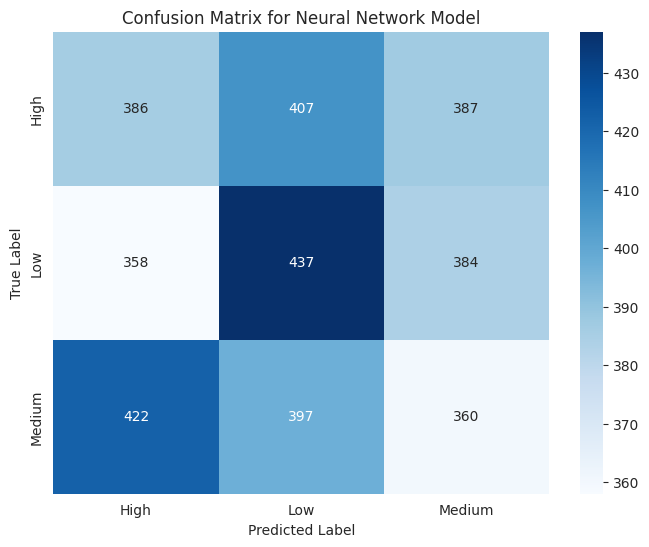

Confusion matrix displayed.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding for Keras
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print("Target variables encoded and one-hot encoded.")
print(f"Original classes: {label_encoder.classes_}")

# 2. Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax for multi-class
])

# 3. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 4. Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test_one_hot),
    verbose=1
)

print("\nModel training complete.")

# 5. Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 6. Make predictions
y_pred_one_hot = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_one_hot, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_encoded)

# 7. Calculate and print classification metrics
accuracy_nn = accuracy_score(y_test, y_pred_labels)
precision_nn = precision_score(y_test, y_pred_labels, average='weighted')
recall_nn = recall_score(y_test, y_pred_labels, average='weighted')
f1_nn = f1_score(y_test, y_pred_labels, average='weighted')

print("\nNeural Network Classification Metrics:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")

# 8. Generate and display a confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_labels, labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Neural Network Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix displayed.")


--- Decision Tree Classifier ---
Accuracy: 0.3349
Precision: 0.3351
Recall: 0.3349
F1-Score: 0.3349


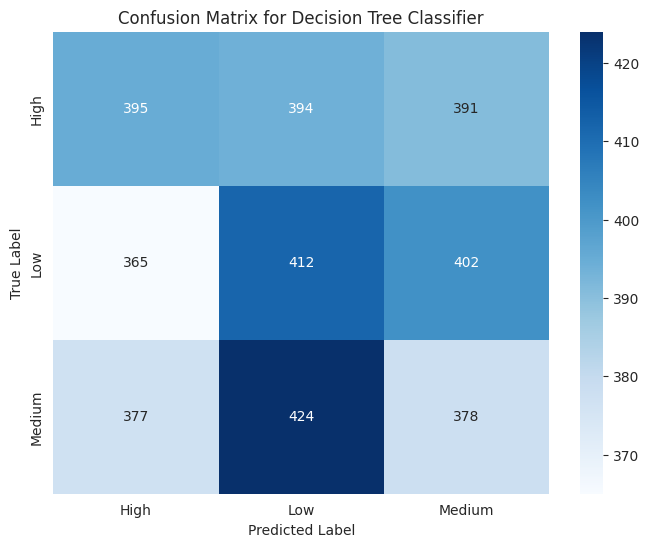


--- Random Forest Classifier ---
Accuracy: 0.3389
Precision: 0.3388
Recall: 0.3389
F1-Score: 0.3385


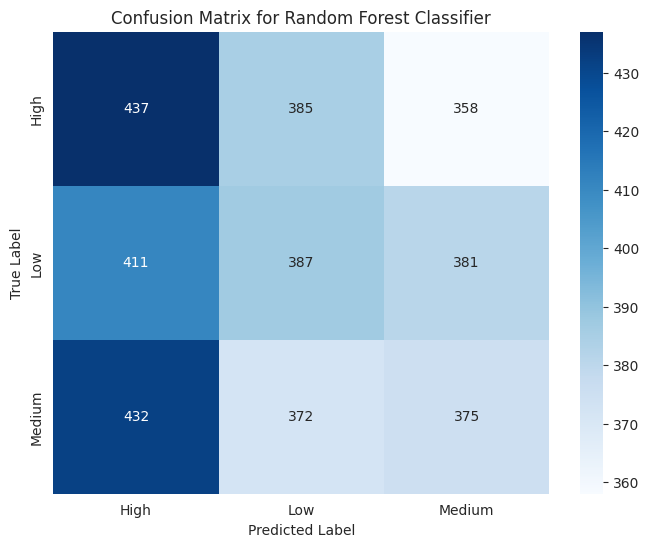

Decision Tree and Random Forest models trained, evaluated, and confusion matrices displayed.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Decision Tree Classifier ---
print("\n--- Decision Tree Classifier ---")
# 1. Instantiate the model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model
dt_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_dt = dt_model.predict(X_test)

# 4. Calculate and print metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

# 5. Generate and display confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Random Forest Classifier ---
print("\n--- Random Forest Classifier ---")
# 1. Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Calculate and print metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# 5. Generate and display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Decision Tree and Random Forest models trained, evaluated, and confusion matrices displayed.")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- Hyperparameter Optimization for Decision Tree Classifier ---
print("\n--- Hyperparameter Optimization for Decision Tree Classifier ---")

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
dt_grid_search.fit(X_train, y_train)

# Report the best parameters and score
print(f"Best Parameters for Decision Tree: {dt_grid_search.best_params_}")
print(f"Best Cross-validation Accuracy for Decision Tree: {dt_grid_search.best_score_:.4f}")

# --- Hyperparameter Optimization for Random Forest Classifier ---
print("\n--- Hyperparameter Optimization for Random Forest Classifier ---")

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
rf_grid_search.fit(X_train, y_train)

# Report the best parameters and score
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best Cross-validation Accuracy for Random Forest: {rf_grid_search.best_score_:.4f}")



--- Hyperparameter Optimization for Decision Tree Classifier ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-validation Accuracy for Decision Tree: 0.3415

--- Hyperparameter Optimization for Random Forest Classifier ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy for Random Forest: 0.3362


Best Random Forest model retrieved.
Feature importances calculated and sorted.


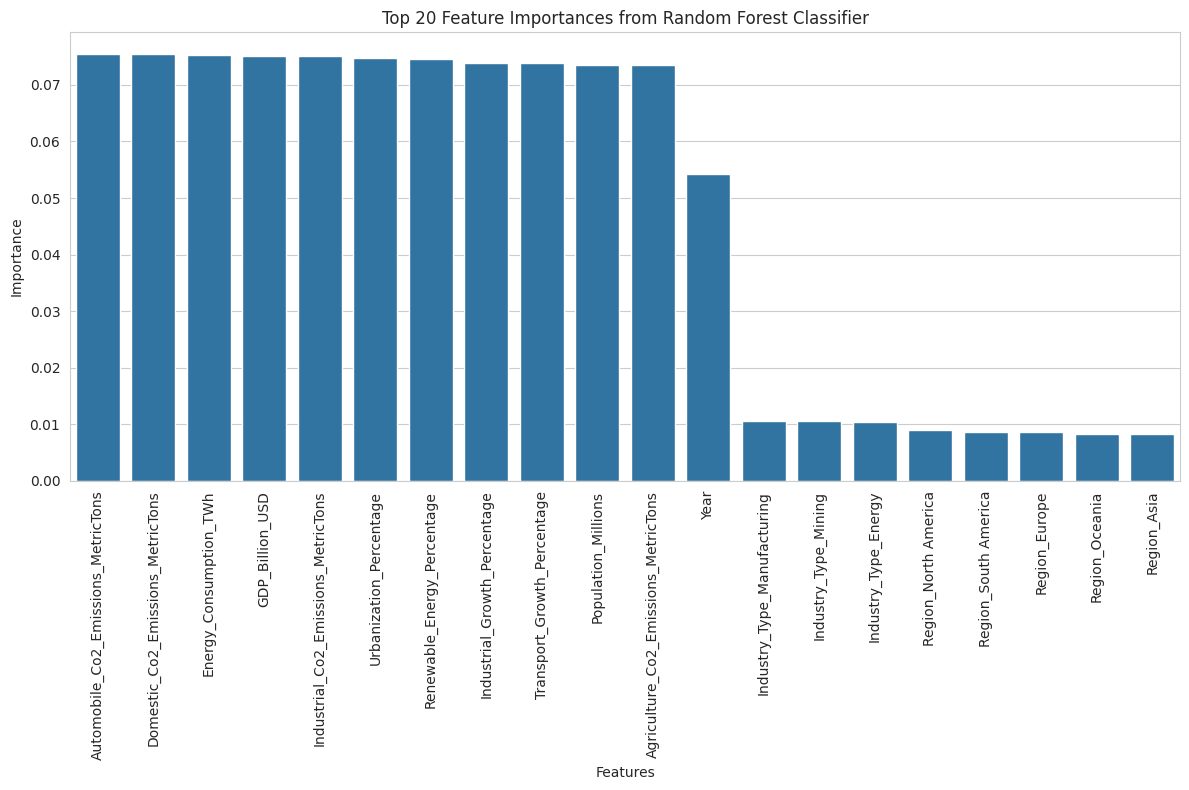

Top 20 Feature Importances visualized.
Selected 15 features based on importance > 0.01:
['Automobile_Co2_Emissions_MetricTons', 'Domestic_Co2_Emissions_MetricTons', 'Energy_Consumption_TWh', 'GDP_Billion_USD', 'Industrial_Co2_Emissions_MetricTons', 'Urbanization_Percentage', 'Renewable_Energy_Percentage', 'Industrial_Growth_Percentage', 'Transport_Growth_Percentage', 'Population_Millions', 'Agriculture_Co2_Emissions_MetricTons', 'Year', 'Industry_Type_Manufacturing', 'Industry_Type_Mining', 'Industry_Type_Energy']
X_train and X_test updated with selected features.
Shape of X_train_selected: (14148, 15)
Shape of X_test_selected: (3538, 15)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Utilize the best RandomForestClassifier model
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest model retrieved.")

# 2. Create a Pandas Series of feature importances
feature_importances = pd.Series(best_rf_model.feature_importances_,
                                  index=X_preprocessed.columns).sort_values(ascending=False)

print("Feature importances calculated and sorted.")

# 3. Visualize the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(20).index, y=feature_importances.head(20).values)
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances from Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
print("Top 20 Feature Importances visualized.")

# 4. Select a subset of features based on a chosen threshold
# Let's choose features with importance greater than 0.01 as an initial threshold.
selected_features = feature_importances[feature_importances > 0.01].index.tolist()

print(f"Selected {len(selected_features)} features based on importance > 0.01:")
print(selected_features)

# 5. Filter X_train and X_test to retain only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("X_train and X_test updated with selected features.")
print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")


--- Retraining Neural Network Model with Selected Features ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,499 (41.01 KB)

 Trainable params: 10,499 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Retrained Neural Network model training complete.

Retrained NN Test Loss: 1.4493
Retrained NN Test Accuracy: 0.3431

Retrained Neural Network Classification Metrics (with selected features):
Accuracy: 0.3431
Precision: 0.3438
Recall: 0.3431
F1-Score: 0.3410


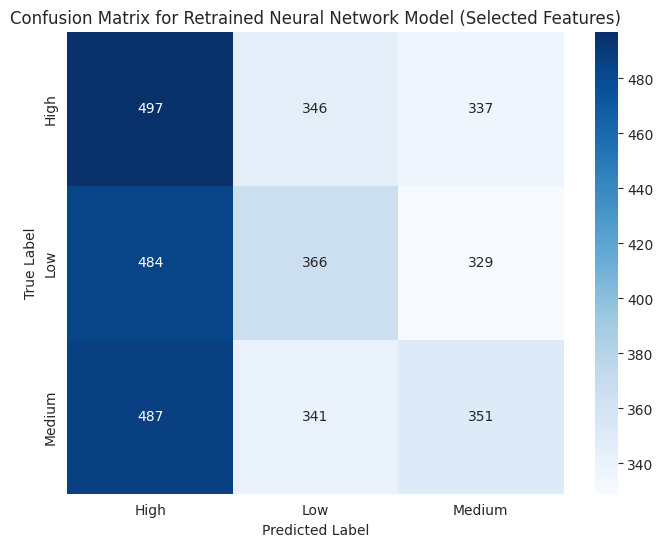

Confusion matrix for retrained NN displayed.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Retrain the Neural Network Model with selected features
print("\n--- Retraining Neural Network Model with Selected Features ---")

# Encode the target variable if not already done for NN (re-run to ensure consistency)
# The previous run already encoded y_train and y_test into y_train_encoded/y_test_encoded
# and then to y_train_one_hot/y_test_one_hot. We'll use the existing label_encoder and one-hot encoded targets.

# Redefine the neural network model with input_shape matching selected features
model_nn_retrained = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax for multi-class
])

# Compile the model
model_nn_retrained.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_nn_retrained.summary()

# Train the model using X_train_selected
history_nn = model_nn_retrained.fit(
    X_train_selected,
    y_train_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_selected, y_test_one_hot),
    verbose=0 # Set to 0 to suppress verbose output during retraining
)

print("Retrained Neural Network model training complete.")

# Evaluate the retrained model on X_test_selected
loss_nn_retrained, accuracy_nn_retrained = model_nn_retrained.evaluate(X_test_selected, y_test_one_hot, verbose=0)
print(f"\nRetrained NN Test Loss: {loss_nn_retrained:.4f}")
print(f"Retrained NN Test Accuracy: {accuracy_nn_retrained:.4f}")

# Make predictions for metric calculation
y_pred_one_hot_nn_retrained = model_nn_retrained.predict(X_test_selected, verbose=0)
y_pred_encoded_nn_retrained = np.argmax(y_pred_one_hot_nn_retrained, axis=1)
y_pred_labels_nn_retrained = label_encoder.inverse_transform(y_pred_encoded_nn_retrained)

# Calculate and store classification metrics for NN
accuracy_nn_final = accuracy_score(y_test, y_pred_labels_nn_retrained)
precision_nn_final = precision_score(y_test, y_pred_labels_nn_retrained, average='weighted')
recall_nn_final = recall_score(y_test, y_pred_labels_nn_retrained, average='weighted')
f1_nn_final = f1_score(y_test, y_pred_labels_nn_retrained, average='weighted')

print("\nRetrained Neural Network Classification Metrics (with selected features):")
print(f"Accuracy: {accuracy_nn_final:.4f}")
print(f"Precision: {precision_nn_final:.4f}")
print(f"Recall: {recall_nn_final:.4f}")
print(f"F1-Score: {f1_nn_final:.4f}")

# Generate and display confusion matrix for retrained NN
cm_nn_retrained = confusion_matrix(y_test, y_pred_labels_nn_retrained, labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_retrained, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Retrained Neural Network Model (Selected Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion matrix for retrained NN displayed.")


--- Retraining Decision Tree Classifier with Optimal Hyperparameters and Selected Features ---
Retrained Decision Tree Classifier Metrics (with selected features and optimized hyperparameters):
Accuracy: 0.3327
Precision: 0.3325
Recall: 0.3327
F1-Score: 0.3312


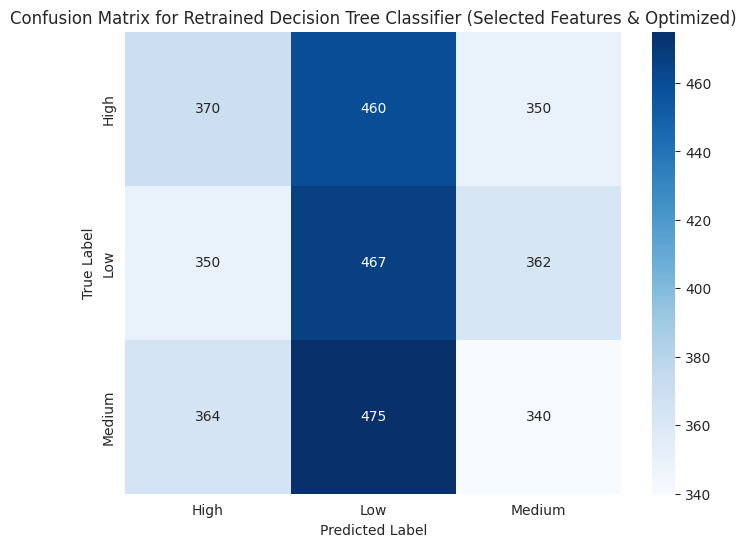

Confusion matrix for retrained Decision Tree displayed.


In [ ]:
print("\n--- Retraining Decision Tree Classifier with Optimal Hyperparameters and Selected Features ---")

# 2. Retrain the Decision Tree Classifier
dt_model_retrained = DecisionTreeClassifier(random_state=42, **dt_grid_search.best_params_)
dt_model_retrained.fit(X_train_selected, y_train)

# Make predictions
y_pred_dt_retrained = dt_model_retrained.predict(X_test_selected)

# Calculate and store metrics
accuracy_dt_final = accuracy_score(y_test, y_pred_dt_retrained)
precision_dt_final = precision_score(y_test, y_pred_dt_retrained, average='weighted')
recall_dt_final = recall_score(y_test, y_pred_dt_retrained, average='weighted')
f1_dt_final = f1_score(y_test, y_pred_dt_retrained, average='weighted')

print("Retrained Decision Tree Classifier Metrics (with selected features and optimized hyperparameters):")
print(f"Accuracy: {accuracy_dt_final:.4f}")
print(f"Precision: {precision_dt_final:.4f}")
print(f"Recall: {recall_dt_final:.4f}")
print(f"F1-Score: {f1_dt_final:.4f}")

# Generate and display confusion matrix
cm_dt_retrained = confusion_matrix(y_test, y_pred_dt_retrained, labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_retrained, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Retrained Decision Tree Classifier (Selected Features & Optimized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion matrix for retrained Decision Tree displayed.")


--- Retraining Random Forest Classifier with Optimal Hyperparameters and Selected Features ---
Retrained Random Forest Classifier Metrics (with selected features and optimized hyperparameters):
Accuracy: 0.3301
Precision: 0.3301
Recall: 0.3301
F1-Score: 0.3296


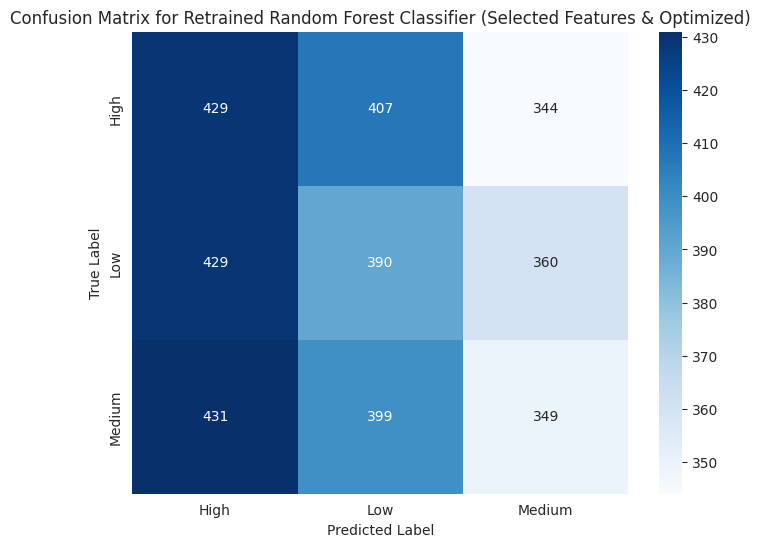

Confusion matrix for retrained Random Forest displayed.


In [ ]:
print("\n--- Retraining Random Forest Classifier with Optimal Hyperparameters and Selected Features ---")

# 3. Retrain the Random Forest Classifier
rf_model_retrained = RandomForestClassifier(random_state=42, **rf_grid_search.best_params_)
rf_model_retrained.fit(X_train_selected, y_train)

# Make predictions
y_pred_rf_retrained = rf_model_retrained.predict(X_test_selected)

# Calculate and store metrics
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_retrained)
precision_rf_final = precision_score(y_test, y_pred_rf_retrained, average='weighted')
recall_rf_final = recall_score(y_test, y_pred_rf_retrained, average='weighted')
f1_rf_final = f1_score(y_test, y_pred_rf_retrained, average='weighted')

print("Retrained Random Forest Classifier Metrics (with selected features and optimized hyperparameters):")
print(f"Accuracy: {accuracy_rf_final:.4f}")
print(f"Precision: {precision_rf_final:.4f}")
print(f"Recall: {recall_rf_final:.4f}")
print(f"F1-Score: {f1_rf_final:.4f}")

# Generate and display confusion matrix
cm_rf_retrained = confusion_matrix(y_test, y_pred_rf_retrained, labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_retrained, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Retrained Random Forest Classifier (Selected Features & Optimized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion matrix for retrained Random Forest displayed.")

In [ ]:
import pandas as pd

print("\n--- Creating Comprehensive Comparison Table ---")

# Prepare data for the comparison table
metrics_data = {
    'Model': ['Neural Network (Retrained)', 'Decision Tree (Optimized)', 'Random Forest (Optimized)'],
    'Accuracy': [accuracy_nn_final, accuracy_dt_final, accuracy_rf_final],
    'Precision (Weighted)': [precision_nn_final, precision_dt_final, precision_rf_final],
    'Recall (Weighted)': [recall_nn_final, recall_dt_final, recall_rf_final],
    'F1-Score (Weighted)': [f1_nn_final, f1_dt_final, f1_rf_final],
    'CV Accuracy (from GridSearchCV)': [None, dt_grid_search.best_score_, rf_grid_search.best_score_]
}

# Create the comparison DataFrame
comparison_df = pd.DataFrame(metrics_data)

print("Comparison Table created:")
print(comparison_df.to_markdown(index=False))



--- Creating Comprehensive Comparison Table ---
Comparison Table created:
| Model                      |   Accuracy |   Precision (Weighted) |   Recall (Weighted) |   F1-Score (Weighted) |   CV Accuracy (from GridSearchCV) |
|:---------------------------|-----------:|-----------------------:|--------------------:|----------------------:|----------------------------------:|
| Neural Network (Retrained) |   0.343132 |               0.343754 |            0.343132 |              0.341012 |                        nan        |
| Decision Tree (Optimized)  |   0.332674 |               0.332542 |            0.332674 |              0.331174 |                          0.341532 |
| Random Forest (Optimized)  |   0.33013  |               0.330113 |            0.33013  |              0.329556 |                          0.336161 |
